### Gauss-Seidel Method
The **Gauss-Seidel Method** is a specific iterative method, that is always using the latest estimated value for each elements in $x$. For example, we first assume the initial values for $x_2, x_3, \cdots, x_n$ (except for $x_1$), and then we can calculate $x_1$. Using the calculated $x_1$ and the rest of the $x$ (except for $x_2$), we can calculate $x_2$. We can continue in the same manner and calculate all the elements in $x$. This will conclude the first iteration. We can see the unique part of Gauss-Seidel method is that we are always using the latest value for calculate the next value in $x$. We can then continue with the iterations until the value converges. Let us use this method to solve the same problem we just solved above. 

**EXAMPLE:** Solve the following system of linear equations using Gauss-Seidel method, use a pre-defined threshold $\epsilon = 0.01$. Do remember to check if the converge condition is satisfied or not. 

\begin{eqnarray*}
8x_1 + 3x_2 - 3x_3 &=& 14 \\
-2x_1 - 8x_2 + 5x_3 &=& 5 \\
3x_1 + 5x_2 + 10x_3 & =& -8 \\
\end{eqnarray*}

Soal pertama Diagonally Dominant, bisa Convergent, dan solvable dengan Gauss-Seidel

In [ ]:
import numpy as np
a = [[10, 3, -3], [-2, -8, 5], [3, 5, 10]]

# Find diagonal coefficients
diag = np.diag(np.abs(a)) 

# Find row sum without diagonal
off_diag = np.sum(np.abs(a), axis=1) - diag 

if np.all(diag > off_diag):
    print('matrix is diagonally dominant')
else:
    print('NOT diagonally dominant')

matrix is diagonally dominant


Since it is guaranteed to converge, we can use Gauss-Seidel method to solve it.

First, change the equation into solution matrix:
8x_1 + 3x_2 - 3x_3 &=& 14 \\


In [ ]:
x1 = 0
x2 = 0
x3 = 0
epsilon = 0.001
converged = False

x_old = np.array([x1, x2, x3])

print('Iteration results')
print(' k,    x1,    x2,    x3 ')
for k in range(1, 50):
    x1 = (14-3*x2+3*x3)/8
    x2 = (5+2*x1-5*x3)/(-8)
    x3 = (-8-3*x1-5*x2)/(10)
    x = np.array([x1, x2, x3])
    # check if it is smaller than threshold
    dx = np.sqrt(np.dot(x-x_old, x-x_old))
    
    print("%d, %.4f, %.4f, %.4f"%(k, x1, x2, x3))
    if dx < epsilon:
        converged = True
        print('Converged!')
        break
        
    # assign the latest x value to the old value
    x_old = x

if not converged:
    print('Not converge, increase the # of iterations')

Iteration results
 k,    x1,    x2,    x3 
1, 1.7500, -1.0625, -0.7937
2, 1.8508, -1.5838, -0.5633
3, 2.1327, -1.5103, -0.6847
4, 2.0596, -1.5678, -0.6340
5, 2.1002, -1.5463, -0.6569
6, 2.0835, -1.5565, -0.6468
7, 2.0911, -1.5520, -0.6513
8, 2.0878, -1.5540, -0.6493
9, 2.0893, -1.5531, -0.6502
10, 2.0886, -1.5535, -0.6498
Converged!


Soal Kedua Tidak Diagonally Dominant & Tidak Convergent.

Contoh persamaan:

\begin{eqnarray*}
9x_1 + x_2 - 7x_3 &=& 14 \\
-2x_1 - x_2 + 5x_3 &=& 5 \\
3x_1 + 5x_2 + 10x_3 & =& -8 \\
\end{eqnarray*}

In [ ]:
import numpy as np
a = [[9, 1, -7], [-2, 1, 5], [3, 5, 1]]

# Find diagonal coefficients
diag = np.diag(np.abs(a)) 

# Find row sum without diagonal
off_diag = np.sum(np.abs(a), axis=1) - diag 

if np.all(diag > off_diag):
    print('matrix is diagonally dominant')
else:
    print('NOT diagonally dominant')

NOT diagonally dominant


In [ ]:
x1 = 0
x2 = 0
x3 = 0
epsilon = 0.01
converged = False

x_old = np.array([x1, x2, x3])

print('Iteration results')
print(' k,    x1,    x2,    x3 ')
for k in range(1, 50):
    x1 = (14-1*x2+7*x3)/(9)
    x2 = (5+2*x1-5*x3)/(1)
    x3 = (-8-3*x1-5*x2)/(1)
    x = np.array([x1, x2, x3])
    # check if it is smaller than threshold
    dx = np.sqrt(np.dot(x-x_old, x-x_old))
    
    print("%d, %.4f, %.4f, %.4f"%(k, x1, x2, x3))
    if dx < epsilon:
        converged = True
        print('Converged!')
        break
        
    # assign the latest x value to the old value
    x_old = x

if not converged:
    print('Not converge, increase the # of iterations')

Iteration results
 k,    x1,    x2,    x3 
1, 1.5556, 8.1111, -53.2222
2, -40.7407, 189.6296, -833.9259
3, -668.1235, 2838.3827, -12195.5432
4, -9799.2428, 41384.2305, -177531.4239
5, -142676.6886, 602308.7421, -2583521.6447
6, -2076327.3617, 8764958.5002, -37595818.4161
7, -30215074.8237, 127548947.4332, -547099520.6949
8, -439693953.1441, 1856109702.1860, -7961466659.4978
9, -6398486256.0745, 27010360790.3401, -115856345191.4769
10, -93111641901.8531, 393058442158.6780, -1685957285095.8306
11, -1354973270868.3879, 5719839883747.3770, -24534279606139.7188
12, -19717755236301.2656, 83235887558101.0625, -357026172081609.5000
13, -286935454681039.2500, 1211259951045974.0000, -5195493391186760.0000
14, -4175523743261475.5000, 17626419469410854.0000, -75605526117269856.0000
15, -60762789143366640.0000, 256502052299616032.0000, -1100221894067980288.0000
16, -884228367863942016.0000, 3732652734612017152.0000, -16010578569468260352.0000
17, -12867411413432203264.0000, 54318070020476895232.000

Soal Ketiga Diagonally Tidak Dominant tapi terkadang bisa Convergent.

Contoh persamaan:

\begin{eqnarray*}
9x_1 + 10x_2 - 7x_3 &=& 14 \\
-2x_1 - 8x_2 + 5x_3 &=& 5 \\
3x_1 + 5x_2 + 10x_3 & =& -8 \\
\end{eqnarray*}

In [ ]:
import numpy as np
a = [[9, 10, -7], [-2, 8, 5], [3, 5, 10]]

# Find diagonal coefficients
diag = np.diag(np.abs(a)) 

# Find row sum without diagonal
off_diag = np.sum(np.abs(a), axis=1) - diag 

if np.all(diag > off_diag):
    print('matrix is diagonally dominant')
else:
    print('NOT diagonally dominant')

NOT diagonally dominant


In [ ]:
x1 = 0
x2 = 0
x3 = 0
epsilon = 0.01
converged = False

x_old = np.array([x1, x2, x3])

print('Iteration results')
print(' k,    x1,    x2,    x3 ')
for k in range(1, 50):
    x1 = (14-10*x2+7*x3)/9
    x2 = (5+2*x1-5*x3)/(8)
    x3 = (-8-3*x1-5*x2)/(10)
    x = np.array([x1, x2, x3])
    # check if it is smaller than threshold
    dx = np.sqrt(np.dot(x-x_old, x-x_old))
    
    print("%d, %.4f, %.4f, %.4f"%(k, x1, x2, x3))
    if dx < epsilon:
        converged = True
        print('Converged!')
        break
        
    # assign the latest x value to the old value
    x_old = x

if not converged:
    print('Not converge, increase the # of iterations')

Iteration results
 k,    x1,    x2,    x3 
1, 1.5556, 1.0139, -1.7736
2, -0.9505, 1.4959, -1.2628
3, -1.0887, 1.1421, -1.0444
4, -0.5257, 1.1463, -1.2154
5, -0.6635, 1.2188, -1.2103
6, -0.7400, 1.1965, -1.1762
7, -0.6887, 1.1880, -1.1874
8, -0.6879, 1.1951, -1.1912
Converged!


Library Linear Algebra Solver

Menggunakan np.linalg.solve

In [ ]:
import numpy as np

A = np.array([[4, 3, -5], 
              [-2, -4, 5], 
              [8, 8, 0]])
y = np.array([2, 5, -3])

x = np.linalg.solve(A, y)
print(x)

[ 2.20833333 -2.58333333 -0.18333333]


Menggunakan Pendekatan Matriks *Inverse*

In [ ]:
A_inv = np.linalg.inv(A)

x = np.dot(A_inv, y)
print(x)

[ 2.20833333 -2.58333333 -0.18333333]


### Least-Square Linier Regression

In [ ]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

# generate x and y
x = np.linspace(0, 1, 101)
y = 1 + x + x * np.random.random(len(x))

# assemble matrix A
A = np.vstack([x, np.ones(len(x))]).T

# turn y into a column vector
y = y[:, np.newaxis]

# Direct least square regression
alpha = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),y)
print(alpha)

[[1.49499389]
 [0.99316105]]


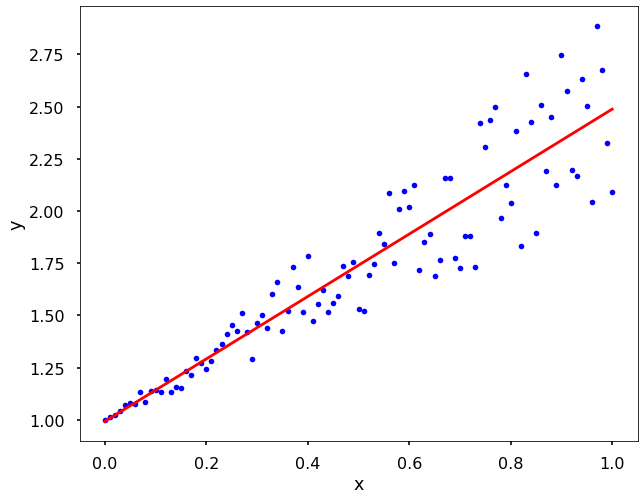

In [ ]:
# plot the results
plt.figure(figsize = (10,8))
plt.plot(x, y, 'b.')
plt.plot(x, alpha[0]*x + alpha[1], 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Use np.linalg.pinv to find Linier Regression

In [ ]:
pinv = np.linalg.pinv(A)
alpha = pinv.dot(y)
print(alpha)

[[1.49499389]
 [0.99316105]]


Use np.linalg to find Linier Regression

In [ ]:
alpha = np.linalg.lstsq(A, y, rcond=None)[0]
print(alpha)

[[1.49499389]
 [0.99316105]]


use optimize.curve_fit

In [ ]:
# generate x and y
x = np.linspace(0, 1, 101)
y = 1 + x + x * np.random.random(len(x))

def func(x, a, b):
    y = a*x + b
    return y

alpha = optimize.curve_fit(func, xdata = x, ydata = y)[0]
print(alpha)

# plot the results
plt.figure(figsize = (10,8))
plt.plot(x, y, 'b.')
plt.plot(x, alpha[0]*x + alpha[1], 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

[1.49913451 0.98910921]


### Plotting Using Matplotlib

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd

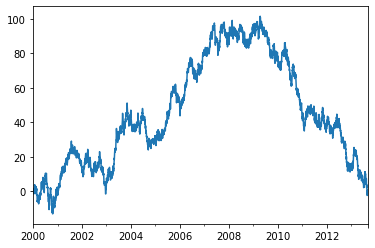

In [ ]:
ts = pd.Series(np.random.randn(5000), index=pd.date_range("1/1/2000", periods=5000))

ts = ts.cumsum()

ts.plot();

<Figure size 432x288 with 0 Axes>

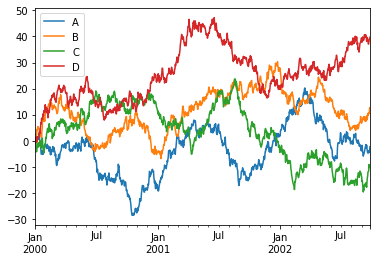

In [ ]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list("ABCD"))

df = df.cumsum()

plt.figure();

df.plot();

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

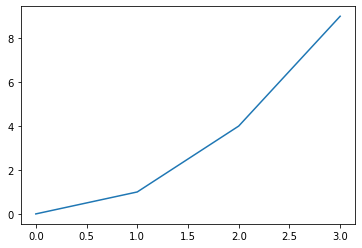

In [ ]:
x = [0, 1, 2, 3] 
y = [0, 1, 4, 9]
plt.plot(x, y)
plt.show()